In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
%matplotlib inline

# 1. Inspect and plot some portion of the training data

In [2]:
data= pd.read_csv(os.path.join('fashion-mnist_train.csv'))

In [3]:
#Initialise a dictionary and map the 'label' from the dataframe 
#to the specific kind of wearable it is.
label_dict = {0:'T-Shirt/Top',1:'Trouser',2:'Pullover',3:'Dress',
              4:'Coat',5:'Sandals',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boots'}

In [4]:
#Segregate the data, normalise the feature vector, initialise a dictionary corresponding to the output array and map it. 
#Print a subset of the data like we did for the hand-written digit classification
def data_clean_Display(data): # 'data' is a pandas datafram                   
        
        y = data.label.values
        X = data.drop('label', axis=1)
        
        
        
        X = np.array(X)
        X = (X - X.min(axis=1)[:,None])/((X.max(axis=1) - X.min(axis=1))[:,None])
        #n = (n - n.min(axis=1)[:,None])/((n.max(axis=1) - n.min(axis=1))[:,None])
        y = np.array(y)# numpy array
    
        
        return X,y

X_train,y_train = data_clean_Display(data)


In [5]:
print(X_train[1:10,:])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.21960784 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Pullover       Ankle boots       Coat       

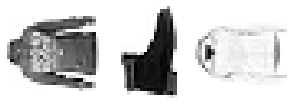

In [6]:
#Write code here to display sample set of data
def displayData(X, example_width=None, figsize=(5, 5)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Display Image
        h = ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                      cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

m = y_train.size

rand_indices = np.random.choice(m, 3, replace=False)

for l in rand_indices:
   print(label_dict[y_train[l]], end='       ')
sel = X_train[rand_indices, :]        


displayData(sel)        

In [7]:
#Implement the sigmoid function
def sigmoid(z):
     
    g = 1/(1 + np.exp(-z))
        
    return g
    



In [8]:
# Prediction based on trained model
# Use sigmoid function to calculate probability rounded off to either 0 or 1
#Prediction function for single hidden layer.
def predictSingleHiddenLayer(w1, w2, X): 
    
    if X.ndim==1:
        X=X[None]
    
    m=X.shape[0]
    num_labels= w2.shape[0]
    
    p= np.zeros(m)
    
    a1= np.concatenate([np.ones((m,1)), X], axis=1) #Input layer
    
    a2= sigmoid(a1.dot(w1.T)) #Hidden Layer
    
    a2= np.concatenate([np.ones((a2.shape[0],1)), a2 ], axis=1) #Activation of 2nd layer
    
    a3= sigmoid(a2.dot(w2.T))
    
    p= np.argmax(a3, axis=1)     # 'p' should be a vector of size equal to that of vector 'y'
        
    return p

In [9]:
#Prediction function for double hidden layer.
def predictDoubleHiddenLayer(w1, w2, w3, X): 
    if X.ndim==1:
        X=X[None]
    
    m=X.shape[0]
    num_labels= w3.shape[0]
    
    p= np.zeros(m)
    
    a1= np.concatenate([np.ones((m,1)), X], axis=1) #Input layer
    
    a2= sigmoid(a1.dot(w1.T)) #Hidden Layer
    
    a2= np.concatenate([np.ones((a2.shape[0],1)), a2 ], axis=1) #Activation of 2nd layer
    
    a3= sigmoid(a2.dot(w2.T))
    
    a3= np.concatenate([np.ones((a3.shape[0],1)), a3 ], axis=1) #Activation of 3rd layer
    
    a4= sigmoid(a3.dot(w3.T))
    
    p= np.argmax(a4, axis=1)     # 'p' should be a vector of size equal to that of vector 'y'
        

        
    return p

In [10]:
#implement the gradient of the sigmoid function
def sigmoidGradient(z):
    g = np.zeros(z.shape)
    g = sigmoid(z)*(1-sigmoid(z))

    return g

In [11]:
# Setup the parameters you will use for this exercise
input_layer_size  =  784
hidden_layer_size_One = 40   
hidden_layer_size_Two = 40  
num_labels = 10          #number of output labels


In [12]:
#randomly initialise weights.
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    W= np.zeros((L_out, L_in+1))
    W= np.random.rand(L_out, L_in+1)*2*epsilon_init-epsilon_init
    
    return W

In [13]:
# for single hidden layer
initial_w1_1 = randInitializeWeights(input_layer_size, hidden_layer_size_One)
initial_w2_1 = randInitializeWeights(hidden_layer_size_One, num_labels)

# for double hidden layer
initial_w1_2 = randInitializeWeights(input_layer_size, hidden_layer_size_One)
initial_w2_2 = randInitializeWeights(hidden_layer_size_One, hidden_layer_size_Two)
initial_w3_2 = randInitializeWeights(hidden_layer_size_Two, num_labels)    #only when you're using the Second Hidden Layer

#Unroll parameters into a single array
initial_nn_params_1 = np.concatenate([initial_w1_1.ravel(), initial_w2_1.ravel()], axis=0)  # for single hidden layer
initial_nn_params_2 = np.concatenate([initial_w1_2.ravel(), initial_w2_2.ravel(), initial_w3_2.ravel()], axis=0)  # for double hidden layer

# 2a.  for one hidden layer

In [14]:
#for one hidden layer
def nnCostFunction_1(nn_params,
                   input_layer_size,
                   hidden_layer_size_One,
                   num_labels,
                   X, y, lambda_=0.1):
    
    
    # Reshape nn_params back into the parameters w1 and w2, the weight matrices
    # for our 2 layer neural network
    s1 = input_layer_size
    s2 = hidden_layer_size_One
    s3 = num_labels
    
    w1 = np.reshape(nn_params[:s2 * (s1 + 1)], (s2, (s1 + 1)))

    w2 = np.reshape(nn_params[(s2 * (s1 + 1)):], (s3, (s2 + 1)))
   
    # Setup some useful variables
    m = y.size
         
    # You need to return the following variables correctly 
    J = 0
    w1_grad = np.zeros(w1.shape)
    w2_grad = np.zeros(w2.shape)

    # ================================================================================================
    
    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    a2 = sigmoid(a1.dot(w1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    
    a3 = sigmoid(a2.dot(w2.T))
    
    y_matrix = y.reshape(-1)
    y_matrix = np.eye(num_labels)[y_matrix]
    
    temp1 = w1
    temp2 = w2
    
    # Add regularization term
    
    reg_term = (lambda_ / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:, 1:])))
    
    J = -(1 / m) * np.sum((np.log(a3) * y_matrix) + np.log(1 - a3) * (1 - y_matrix)) + reg_term
  
    # Backpropogation
    delta_3= a3-y_matrix #Error of O/P layer
    delta_2= delta_3.dot(w2)[:, 1:]*sigmoidGradient(a1.dot(w1.T)) #Error of hidden layer 1.
    
    Delta1= delta_2.T.dot(a1)
    Delta2= delta_3.T.dot(a2)

    
    # Add regularization to gradient

    
    w1_grad= (1/m)*Delta1
    w2_grad= (1/m)*Delta2
    
    w1_grad[:, 1:]=  w1_grad[:, 1:] + (lambda_/m)*w1[:, 1:]
    w2_grad[:, 1:]=  w2_grad[:, 1:] + (lambda_/m)*w2[:, 1:]
    
    grad= np.concatenate([w1_grad.ravel(), w2_grad.ravel()]) 
    #=======================================================================================================
   
    
    return J,grad

# 2b. for two hidden layers

In [15]:


def nnCostFunction_2(nn_params,
                   input_layer_size,
                   hidden_layer_size_One,
                   hidden_layer_size_Two,
                   num_labels,
                   X, y, lambda_=0.1):
    
    
    # Reshape nn_params back into the parameters w1 ,w2 and w3, the weight matrices
    s1 = input_layer_size
    s2 = hidden_layer_size_One
    s3 = hidden_layer_size_Two
    s4 = num_labels
    
    w1 = np.reshape(nn_params[:s2 * (s1 + 1)], (s2, (s1 + 1)))

    w2 = np.reshape(nn_params[(s2 * (s1 + 1)):s2 * (s1 + 1)+(s3 * (s2 + 1))], (s3, (s2 + 1)))
    w3 = np.reshape(nn_params[(s2 * (s1 + 1)+(s3 * (s2 + 1))):], (s4, (s3 + 1)))
    # Setup some useful variables
    m = y.size
         
    # You need to return the following variables correctly 
    J = 0
    w1_grad = np.zeros(w1.shape)
    w2_grad = np.zeros(w2.shape)
    w3_grad = np.zeros(w3.shape)

    # ================================================================================================
    
    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    a2 = sigmoid(a1.dot(w1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    
    a3 = sigmoid(a2.dot(w2.T))
    a3 = np.concatenate([np.ones((a3.shape[0], 1)), a3], axis=1)
    
    a4 = sigmoid(a3.dot(w3.T))
    
    y_matrix = y.reshape(-1)
    y_matrix = np.eye(num_labels)[y_matrix]
    
    temp1 = w1
    temp2 = w2
    temp3 = w3
    # Add regularization term
    
    reg_term = (lambda_ / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:, 1:])) + np.sum(np.square(temp3[:, 1:])))
    
    J = (-1 / m) * np.sum((np.log(a4) * y_matrix) + np.log(1 - a4) * (1 - y_matrix)) + reg_term
  
    # Backpropogation
    delta_4= a4-y_matrix #Error of O/P layer
    delta_3= delta_4.dot(w3)[:, 1:]*sigmoidGradient(a2.dot(w2.T))  #Error of hidden layer 2.
    delta_2= delta_3.dot(w2)[:, 1:]*sigmoidGradient(a1.dot(w1.T))  #Error of hidden layer 1.
    Delta1= delta_2.T.dot(a1)
    Delta2= delta_3.T.dot(a2)
    Delta3= delta_4.T.dot(a3)
    
    # Add regularization to gradient

    
    w1_grad= (1/m)*Delta1
    w2_grad= (1/m)*Delta2
    w3_grad= (1/m)*Delta3
    
    w1_grad[:, 1:]=  w1_grad[:, 1:] + (lambda_/m)*w1[:, 1:]
    w2_grad[:, 1:]=  w2_grad[:, 1:] + (lambda_/m)*w2[:, 1:]
    w3_grad[:, 1:]=  w3_grad[:, 1:] + (lambda_/m)*w3[:, 1:]
    
    grad= np.concatenate([w1_grad.ravel(), w2_grad.ravel(), w3_grad.ravel()]) 
    #=======================================================================================================
   
    
   
    return J,grad

In [16]:
# for single hidden layer

# Write code to pass the cost function to scipy's optimise.minimize

options= {'maxiter': 4000}


lambda_ = 0.1


costFunction_1 = lambda p: nnCostFunction_1(p, input_layer_size, # p == nn_param
                                        hidden_layer_size_One,
                                        num_labels, X_train, y_train, lambda_)

res_1 = optimize.minimize(costFunction_1,
                        initial_nn_params_1,
                        jac=True,
                        method='TNC',
                        options=options)

In [17]:
res_1

     fun: 0.051366870584946794
     jac: array([-3.73045991e-06, -5.98592710e-10,  1.93581103e-09, ...,
       -4.39902546e-06, -7.92631566e-06, -9.53575926e-06])
 message: 'Max. number of function evaluations reached'
    nfev: 4000
     nit: 208
  status: 3
 success: False
       x: array([ 1.73729593e+00, -1.09557659e-03, -8.94366636e-03, ...,
       -4.45191687e+00,  4.33263776e+00,  1.65157078e+00])

In [18]:
# for double hidden layers

options= {'maxiter': 4000}


lambda_ = 0.1


costFunction_2 = lambda p: nnCostFunction_2(p, input_layer_size, # p == nn_param
                                        hidden_layer_size_One,
                                        hidden_layer_size_Two,
                                        num_labels, X_train, y_train, lambda_)

res_2 = optimize.minimize(costFunction_2,
                        initial_nn_params_2,
                        jac=True,
                        method='TNC',
                        options=options)

In [19]:
res_2

     fun: 0.024353527706477602
     jac: array([ 4.23221875e-06, -5.50175969e-10,  9.02109110e-09, ...,
        3.23519393e-06,  2.92366719e-06,  2.18376675e-06])
 message: 'Max. number of function evaluations reached'
    nfev: 4000
     nit: 256
  status: 3
 success: False
       x: array([-1.75573259e-01, -5.02476111e-05, -3.10517470e-03, ...,
        6.97594206e-01,  6.66087848e-01,  9.05283597e-01])

In [20]:
#Read in the test data at this point

data_test= pd.read_csv('fashion-mnist_test.csv')
X_test,y_test = data_clean_Display(data_test)


In [21]:
#Break the nn_params into weights depending on how many layers you're using and 
#pass it to the predict function according to the number of layers you're using.

## for single hidden layer

nn_params_1 = res_1.x 
        
# Obtained w1 and w2 back from nn_params
w1_1 = np.reshape(nn_params_1[:hidden_layer_size_One * (input_layer_size + 1)],
                        (hidden_layer_size_One, (input_layer_size + 1)))

w2_1 = np.reshape(nn_params_1[(hidden_layer_size_One * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size_One + 1)))

#check how the learned weights are performing on the test data.
p_1 = predictSingleHiddenLayer(w1_1, w2_1, X_test)

accuracy_1 = (np.mean(p_1 == y_test) * 100)

In [22]:
## for double hidden layers


nn_params_2 = res_2.x 
        
# Obtained w1, w2 and w3 back from nn_params
w1_2 = np.reshape(nn_params_2[:hidden_layer_size_One * (input_layer_size + 1)],
                        (hidden_layer_size_One, (input_layer_size + 1)))

w2_2 = np.reshape(nn_params_2[(hidden_layer_size_One * (input_layer_size + 1)):hidden_layer_size_One * (input_layer_size + 1)+(hidden_layer_size_Two * (hidden_layer_size_One + 1))],
                        (hidden_layer_size_Two, (hidden_layer_size_One + 1)))
w3_2 = np.reshape(nn_params_2[(hidden_layer_size_One * (input_layer_size + 1)+(hidden_layer_size_Two * (hidden_layer_size_One + 1))):],
                        (num_labels, (hidden_layer_size_Two + 1)))


#check how the learned weights are performing on the test data.

p_2 = predictDoubleHiddenLayer(w1_2, w2_2, w3_2, X_test)
accuracy_2 = (np.mean(p_2 == y_test) * 100)

# 3. COMPARE the prediction efficiency of the NN from one hidden layer to double hidden layer >>>>>>for trainig and testing data respectively


In [23]:
p_train_1 = predictSingleHiddenLayer(w1_1, w2_1, X_train)
p_train_2 = predictDoubleHiddenLayer(w1_2, w2_2,w3_2, X_train)
print('Train Data Accuracy for single hidden layer : ',np.round(np.mean(p_train_1 == y_train) * 100,3))
print('Train Data Accuracy for double hidden layer : ',np.round(np.mean(p_train_2 == y_train) * 100,3))

Train Data Accuracy for single hidden layer :  100.0
Train Data Accuracy for double hidden layer :  100.0


In [24]:
p_1 = predictSingleHiddenLayer(w1_1, w2_1, X_test)
accuracy_1 = (np.mean(p_1 == y_test) * 100)

p_2 = predictDoubleHiddenLayer(w1_2, w2_2, w3_2, X_test)
accuracy_2 = (np.mean(p_2 == y_test) * 100)

print('Test Data Accuracy for single hidden layer : ',np.round(accuracy_1,3))
print('Test Data Accuracy for double hidden layer : ',np.round(accuracy_2,3))

Test Data Accuracy for single hidden layer :  90.0
Test Data Accuracy for double hidden layer :  86.667


# 4. Use the test data to plot few images along with the model predicted labels/classes

Dress         Shirt         Ankle boots         

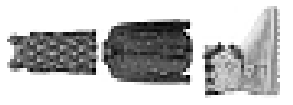

In [26]:
m = y_test.size
# Randomly selected 49 data points to display
rand_indices = np.random.choice(m, 3, replace=False)

for i in rand_indices:
   print(label_dict[y_test[i]], end='         ')
sel = X_test[rand_indices, :]
displayData(sel)  

# 5. Compare how the two NNs fare in terms of prediction accuracy for the same number of optimisation iterations

Theoretically speaking there will be more accuracy with incrament in 
the number of layers and the number of nodes in a particular layer. 
So, since two hidden layers will have more number of layers so it should 
be more accurate but will become more complex for computions.